# AI06 - TD01

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Exercice 1
#### Question 1
Exprimer $R$ en fonction de $P$ :

$P = 2R - 1000 \Leftrightarrow R = \frac{R + 1000}{2}$

#### Question 2

Montrer qu'à l'équilibre on a $R$ = $R_0$.

En déduire la valeur des résistances réglables $R_0$.

$\begin{align*}
v & = V_A - V_B = E(\frac{R}{R_0 + R} - \frac{1}{2}) \\ 
& \Leftrightarrow \frac{R}{R_0-R} = \frac{1}{2} \\
& \Leftrightarrow R = \frac{R_0 - R}{2} \\
& \Leftrightarrow \frac{R}{2} = \frac{R_0}{2} \\
& \Leftrightarrow R = R_0 \\
& \Rightarrow R_0 = \frac{1}{2}1013 + 500 = 1006.5\Omega
\end{align*}$

#### Question 3

Exprimer $v$ en fonction de $P$ et tracer la courbe d'étalonnage.

$\begin{align*}
v & = E(\frac{\frac{P}{2}+500}{R_0 + \frac{P}{2} + 500} - \frac{1}{2}) \\
& = E(\frac{P + 1000}{2R_0 + P + 1000} - \frac{1}{2}) \\
& = E(\frac{P + 1000}{P_0 + P + 2000} - \frac{1}{2}) \\
& = 12(\frac{P + 1000}{P + 3013} - \frac{1}{2}) \\
\end{align*}$


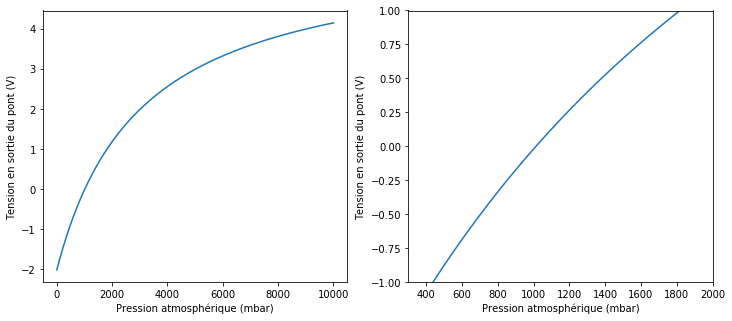

In [67]:
x = np.linspace(0, 10000, 1000)
y = 12 * ((x + 1000) / (x + 3013) -1/2)

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)

plt.plot(x,y)
plt.xlabel('Pression atmosphérique (mbar)')
plt.ylabel('Tension en sortie du pont (V)')
plt.subplot(1, 2, 2)

plt.plot(x,y)
plt.xlabel('Pression atmosphérique (mbar)')
plt.ylabel('Tension en sortie du pont (V)')
plt.xlim([300, 2000])
plt.ylim([-1, 1])

plt.show()

#### Question 4

Donner l'expression de $P$ en fonction de $v$.

$\begin{align*}
v & = 12(\frac{P + 1000}{P + 3013} - \frac{1}{2}) \\
\frac{v}{12} + \frac{1}{2} & = \frac{P+1000}{P+3013} \\
(\frac{v}{12} + \frac{1}{2}(P+3013) & = P + 1000 \\
\frac{v+6}{12}(P+3013) & = P + 1000 \\
\frac{1}{12}(v+6)(P+3013) & = P + 1000 \\
(v+6)(P+3013) & = 12P + 12000 \\
(v+6)P + 3013v + 18078 & = 12P + 12000 \\
(v+6)P - 12P - 12000 & = -3013v - 18078 \\
vP + 6P - 12P - 12000 & = -3013v - 18078 \\
vP - 6P - 12000 & = -3013v - 18078 \\
P(v-6) & = -3013v - 18078 + 12000 \\
P & = \frac{-3013v - 6078}{v-6} \\
P & = \frac{3013v + 6078}{6-v}
\end{align*}$


#### Question 5


On suppose que le capteur donne une tension de sortie $v$ entre $-1V$ et $+1V$. Calculer l'étendue de mesure du capteur.

$v = 1 \Rightarrow P = \frac{3013 + 6078}{6-1} = 1818.2\text{mbar}$


$v = -1 \Rightarrow P = \frac{-3013 + 6078}{6-(-1)} = 437.9\text{mbar}$

#### Question 6

En supposant naïvement un fonctionnement linéaire sur toute l'étendue de mesure, quelle erreur commet-on lors de la mesure de la pression atmosphérique moyenne ?

$v(P) = 12(\frac{P+1000}{P+3013} - \frac{1}{2}) \\
\tilde{v}(P) = A*P + B \Rightarrow \tilde{v}(P_0) = \mathbb{?}$

$\begin{cases}
    -1 = A = 437.9 + B \\
    +1 = A * 1818.2 + B 
\end{cases}\\
\begin{align*}
    \Rightarrow 2 & = A(1818.2 - 437.9) \\
    \Rightarrow A & = \frac{1818.2-437.9}{2} = 1.449*10^{-3} \\
    \Rightarrow B & = -1.634
\end{align*}$




Si 

$\begin{align*}
    \tilde{v}(P) = 0V  & \Leftrightarrow AP + B = 0 \\
                       & \Leftrightarrow AP = -B \\
                       & \Leftrightarrow P = -\frac{B}{A} = \frac{1.634}{1.449*10^{-3}} = 1128 \text{mbar}
\end{align*}$



#### Question 7

Quelle est la valeur maximale de l'erreur de mesure de pression ?

$\begin{align*}Err(v)& = \tilde{P}(v) - P(v) \\
                     & = \frac{V-B}{A} - \frac{3013v + 6078}{6-v}
\end{align*}$

$\begin{align*}
Err'(v) & = \frac{1}{A} - \left[ (3013v + 6078)\frac{1}{6-v}^2 + 3013\frac{1}{6-v} \right] \\
Err'(v) & = \frac{1}{A} - \frac{3013v + 6078 + 3013(6-v)}{(6-v)^2}
\end{align*}$

$\begin{align*} 
Err'(v) = 0 \Leftrightarrow \frac{(6-v)^2}{A} & = 3013v + 6078 + 3013(6-v) \\
                                              & = 6078 + 6*3013 \\
                                      (6-v)^2 & = A * 24156 \\
                                          6-v & = \sqrt{A * 24156} \\                                          
                                            v & = 6 \pm \sqrt{A * 24156} \\
                                            v = 0.084V & \text{ou} \ v = 11.916V
\end{align*}$

L'erreur est ainsi maximale pour V = 0.084V

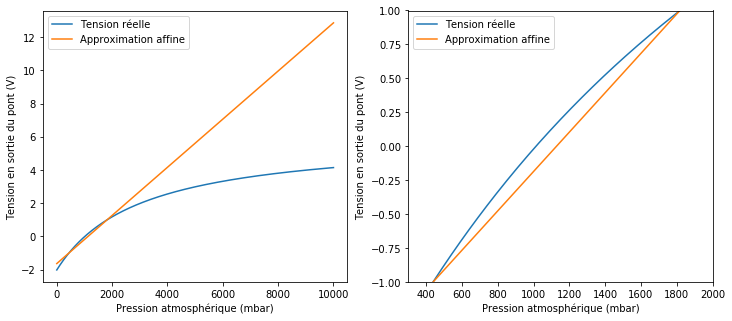

In [80]:
y_affine = x*1.449e-3 -1.634

plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
plt.plot(x, y, label='Tension réelle')
plt.plot(x, y_affine, label='Approximation affine')
plt.xlabel('Pression atmosphérique (mbar)')
plt.ylabel('Tension en sortie du pont (V)')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y, label='Tension réelle')
plt.plot(x, y_affine, label='Approximation affine')
plt.xlabel('Pression atmosphérique (mbar)')
plt.ylabel('Tension en sortie du pont (V)')
plt.xlim([300, 2000])
plt.ylim([-1, 1])
plt.legend()
plt.show()

# Exercice 2

In [184]:
df = pd.DataFrame({
    'Entrées E': np.arange(0, 8, 1),
    'Observations': [0.014, 1.241, 2.487, 3.767, 5.015, 6.245, 7.508, 8.734]
}).set_index('Entrées E')

df['Théorie'] = np.linspace(0, 10, num = df.shape[0])
df.T

Entrées E,0,1,2,3,4,5,6,7
Observations,0.014,1.241000,2.487000,3.767000,5.015000,6.245000,7.508000,8.734
Théorie,0.000,1.428571,2.857143,4.285714,5.714286,7.142857,8.571429,10.000


In [183]:
df['Réglage 0'] = df['Observations'] - df.loc[0, 'Observations']
df['Réglage gain'] = df['Réglage 0'] * 10 / df.loc[len(df)-1, 'Réglage 0']
df['Erreur'] = df['Réglage gain'] - df['Théorie']
df.T

Entrées E,0,1,2,3,4,5,6,7
Observations,0.014,1.241000,2.487000,3.767000,5.015000,6.245000,7.508000,8.734
Théorie,0.000,1.428571,2.857143,4.285714,5.714286,7.142857,8.571429,10.000
Réglage 0,0.000,1.227000,2.473000,3.753000,5.001000,6.231000,7.494000,8.720
Réglage gain,0.000,1.407110,2.836009,4.303899,5.735092,7.145642,8.594037,10.000
Erreur,0.000,-0.021461,-0.021134,0.018185,0.020806,0.002785,0.022608,0.000
